### What are Embeddings ?

embeddings are a way to transfer words in to  language that computer understnads --- like numbers 

In [54]:
import numpy as np
import matplotlib.pyplot as plt


In [55]:
# Simplified 2D example (real embeddings have hundreds of dimensions
word_embeddings = {
    "cat": [0.8, 0.6],
    "kitten": [0.75, 0.65],
    "dog": [0.9, 0.5],
    "puppy": [0.85, 0.55],
    "fish": [0.2, 0.1],
    "bird": [0.3, 0.4],
    "car": [0.5, 0.8],
    "bike": [0.6, 0.7],
    "train": [0.4, 0.9],
    "plane": [0.7, 0.3]
}



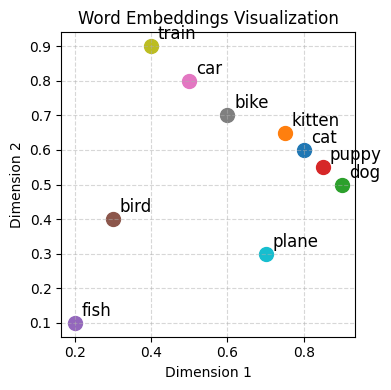

In [56]:
# This code visualizes a simplified 2D representation of word embeddings.
fig, ax = plt.subplots(figsize=(4, 4))  # You can adjust width and height (in inches)
for word, vec in word_embeddings.items():
    ax.scatter(vec[0], vec[1], s=100)
    ax.annotate(word, (vec[0], vec[1],), xytext=(5,5), textcoords='offset points', fontsize=12)

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_title('Word Embeddings Visualization')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
# This code visualizes a simplified 2D representation of word embeddings.
# In practice, embeddings are high-dimensional vectors, but for visualization, we often reduce them to 2D or 3D using techniques like PCA or t-SNE.
# Note: The above code is a simplified example. In practice, you would use libraries like `gensim` or `transformers` to work with real word embeddings.
# The above code is a simplified example. In practice, you would use libraries like `gensim` or `transformers` to work with real word embeddings.

In [57]:
#this code helps in finding similar words based on their embeddings.
def similarity(vec1, vec2):
    vec1 = np.array(vec1)
    vec2 = np.array(vec2)
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

# Example usage
cat_vector = [0.8, 0.6]
kitten_vector = [0.75, 0.65]
car_vector = [-0.5, -0.2] 
print("Similarity between 'cat' and 'kitten':", similarity(cat_vector, kitten_vector))
print("Similarity between 'cat' and 'car':", similarity(cat_vector, car_vector))

Similarity between 'cat' and 'kitten': 0.9975095892825593
Similarity between 'cat' and 'car': -0.9656157585206696


###Creating Your First Embeddings With HuggingFace Embedding Models

In [58]:
### Huggingsface and OpenAI embeddings
# To use Hugging Face or OpenAI embeddings, you would typically use their respective libraries.
# For Hugging Face, you can use the `transformers` library to load pre-trained models and generate embeddings.
# For OpenAI, you can use the `openai` library to access their API for generating embeddings.
# Here's a brief example of how you might use Hugging Face's `transformers` library:
# from transformers import AutoTokenizer, AutoModel

from langchain.embeddings import HuggingFaceEmbeddings

embeddings = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2")


In [59]:
embeddings = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2")

text = "This is a sample sentence."
embedding = embeddings.embed_query(text)
print(f"Embedding for '{text}': {embedding}")


Embedding for 'This is a sample sentence.': [0.07780639082193375, 0.07646249234676361, 0.037708830088377, 0.06093890964984894, 0.04880760610103607, 0.0071116602048277855, 0.02063676156103611, 0.02864636667072773, 0.06352155655622482, 0.0149655407294631, 0.07552337646484375, -0.05633345618844032, -0.0004156892537139356, -0.020939769223332405, 0.06408892571926117, 0.02224086783826351, 0.048893239349126816, -0.05742981657385826, -0.029932308942079544, 0.04038858413696289, 0.030755359679460526, 0.03820839524269104, 0.04590107873082161, 0.007849989458918571, 0.004377075470983982, 0.03391490504145622, -0.013384627178311348, 0.05275416001677513, 0.10236843675374985, 0.0002796643238980323, -0.057564496994018555, 0.04393520578742027, 0.08338939398527145, 0.016285015270113945, 0.07246050983667374, 0.007320192642509937, -0.023329634219408035, 0.054399147629737854, -0.005939170252531767, 0.029254725202918053, 0.04844086244702339, -0.03953506797552109, 0.03565709665417671, 0.007588629145175219, -0.

In [60]:
sentences = [
            "This is a sample sentence.", 
            "This is another example sentence.",
            "This is a different sentence for testing.",
            "This is a completely unrelated sentence."
            ]
encoded_text = embeddings.embed_documents(sentences)
print(f"Encoded sentences for '{sentences[0]}': {encoded_text[0]}")
print(f"Encoded sentences for '{sentences[1]}': {encoded_text[1]}") 

Encoded sentences for 'This is a sample sentence.': [0.07780639082193375, 0.07646249234676361, 0.037708830088377, 0.06093890964984894, 0.04880760610103607, 0.0071116602048277855, 0.02063676156103611, 0.02864636667072773, 0.06352155655622482, 0.0149655407294631, 0.07552337646484375, -0.05633345618844032, -0.0004156892537139356, -0.020939769223332405, 0.06408892571926117, 0.02224086783826351, 0.048893239349126816, -0.05742981657385826, -0.029932308942079544, 0.04038858413696289, 0.030755359679460526, 0.03820839524269104, 0.04590107873082161, 0.007849989458918571, 0.004377075470983982, 0.03391490504145622, -0.013384627178311348, 0.05275416001677513, 0.10236843675374985, 0.0002796643238980323, -0.057564496994018555, 0.04393520578742027, 0.08338939398527145, 0.016285015270113945, 0.07246050983667374, 0.007320192642509937, -0.023329634219408035, 0.054399147629737854, -0.005939170252531767, 0.029254725202918053, 0.04844086244702339, -0.03953506797552109, 0.03565709665417671, 0.007588629145175

In [61]:


from langchain.embeddings import HuggingFaceEmbeddings
from sentence_transformers import SentenceTransformer
sentences = ["This is an example sentence", "Each sentence is converted"]

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
embeddings = model.encode(text)
#em=model.embed_query(text)
print(embeddings)
# Note: The above code is a simplified example. In practice, you would use libraries like `gensim` or `transformers` to work with real word embeddings.
# The above code is a simplified example. In practice, you would use libraries like `gensim` or `transformers` to work with real word embeddings.

[ 7.78063908e-02  7.64624923e-02  3.77088301e-02  6.09389096e-02
  4.88076061e-02  7.11166020e-03  2.06367616e-02  2.86463667e-02
  6.35215566e-02  1.49655407e-02  7.55233765e-02 -5.63334562e-02
 -4.15689254e-04 -2.09397692e-02  6.40889257e-02  2.22408678e-02
  4.88932393e-02 -5.74298166e-02 -2.99323089e-02  4.03885841e-02
  3.07553597e-02  3.82083952e-02  4.59010787e-02  7.84998946e-03
  4.37707547e-03  3.39149050e-02 -1.33846272e-02  5.27541600e-02
  1.02368437e-01  2.79664324e-04 -5.75644970e-02  4.39352058e-02
  8.33893940e-02  1.62850153e-02  7.24605098e-02  7.32019264e-03
 -2.33296342e-02  5.43991476e-02 -5.93917025e-03  2.92547252e-02
  4.84408624e-02 -3.95350680e-02  3.56570967e-02  7.58862915e-03
 -1.70144960e-02 -3.67176682e-02 -3.15289423e-02  9.60674137e-03
 -1.58553198e-02  4.69976515e-02 -7.87202492e-02 -3.92243303e-02
 -1.03012383e-01 -8.17156304e-03  1.21502103e-02  2.70931087e-02
  9.10841953e-03  3.93027477e-02  3.85507792e-02 -2.39005359e-03
 -2.84305811e-02 -2.29119

      "📊 Popular Open Source Embedding Models:\n",
      "\n",
      "Model: sentence-transformers/all-MiniLM-L6-v2\n",
      "  📏 Embedding size: 384 dimensions\n",
      "  📝 Description: Fast and efficient, good quality\n",
      "  🎯 Use case: General purpose, real-time applications\n",
      "\n",
      "Model: sentence-transformers/all-mpnet-base-v2\n",
      "  📏 Embedding size: 768 dimensions\n",
      "  📝 Description: Best quality, slower than MiniLM\n",
      "  🎯 Use case: When quality matters more than speed\n",
      "\n",
      "Model: sentence-transformers/all-MiniLM-L12-v2\n",
      "  📏 Embedding size: 384 dimensions\n",
      "  📝 Description: Slightly better than L6, bit slower\n",
      "  🎯 Use case: Good balance of speed and quality\n",
      "\n",
      "Model: sentence-transformers/multi-qa-MiniLM-L6-cos-v1\n",
      "  📏 Embedding size: 384 dimensions\n",
      "  📝 Description: Optimized for question-answering\n",
      "  🎯 Use case: Q&A systems, semantic search\n",
      "\n",
      "Model: sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2\n",
      "  📏 Embedding size: 384 dimensions\n",
      "  📝 Description: Supports 50+ languages\n",
      "  🎯 Use case: Multilingual applications\n",
      "\n"